In [23]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import math
from math import exp,log
from random import randint
import matplotlib.pyplot as plt
import random
x_train,y_train=load_svmlight_file("C:/Users/Bean/Desktop/机器学习/机器学习实验课/a9a.txt")
x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_test,y_test=load_svmlight_file("C:/Users/Bean/Desktop/机器学习/机器学习实验课/a9a.t",123)
x_test=x_test.toarray()
x_test=np.hstack((x_test,np.ones([np.shape(x_test)[0],1])))
y_test=y_test.reshape(np.shape(y_test)[0],1)

n=np.shape(x_train)[0]
m=np.shape(x_train)[1]

def lossFunction(X,Y,W):
    n,m=X.shape
    loss=0
    for i in range(n):
        loss=loss+math.log((1+math.exp(-Y[i]*W.T.dot(X[i]))),math.e)
    return loss/n

def gradient(X,Y,W):
    n,m=X.shape
    g=0
    for i in range(n):
        g=g-Y[i]*X[i]/(1+exp(Y[i]*W.T.dot(X[i])))
    return (g/n).reshape((g.shape[0],1))

In [24]:
#NAG
W=np.zeros((m,1))
NAG=[]
eta=0.001
gamma=0.9
batch=100

v=0
for epoch in range(1500):
    random.seed()
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W-gamma*v)
    v=gamma*v+eta*g
    W=W-v
    l_test=lossFunction(x_test,y_test,W)
    NAG.append(l_test)
print("finish") 

finish


In [25]:
#RMSProp
W=np.zeros((m,1))
RMSProp=[]
eta=0.001
gamma=0.9
epsilon=1e-8
batch=100
G=0
for epoch in range(1500):
    random.seed()
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W)
    G=gamma*G+(1-gamma)*(g*g)
    W=W-eta/np.sqrt(G+epsilon)*g
    l_test=lossFunction(x_test,y_test,W)
    RMSProp.append(l_test)
print('finished') 

finished


In [26]:
#AdaDelta
W=np.zeros((m,1))
AdaDelta=[]
gamma=0.95
epsilon=1e-6
batch=100
G=0
dt=0
for epoch in range(1500):
    random.seed()
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W)
    G=gamma*G+(1-gamma)*g*g
    dw=-np.sqrt(dt+epsilon)/np.sqrt(G+epsilon)*g
    W=W+dw
    dt=gamma*dt+(1-gamma)*dw*dw
    l_test=lossFunction(x_test,y_test,W)
    AdaDelta.append(l_test)
print('finished') 

finished


In [27]:
#Adam
W=np.zeros((m,1))
Adam=[]
beta=0.9
gamma=0.999
eta=0.001
epsilon=1e-6
batch=100
M=0
for epoch in range(1500):
    i=randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W)
    M=beta*M+(1-beta)*g
    G=gamma*G+(1-gamma)*g*g
    alpha=eta*np.sqrt(1-math.pow(gamma,epoch))/(1-beta)
    W=W-alpha*M/np.sqrt(G+epsilon)
    l_test=lossFunction(x_test,y_test,W)
    Adam.append(l_test)
print('finished') 

finished


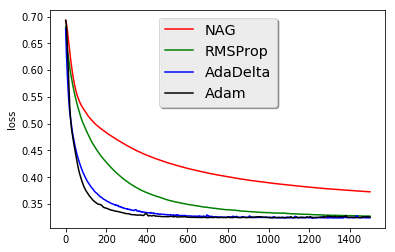

In [29]:
plt.ylabel("loss")
plt.plot(NAG,color='red',label='NAG')
plt.plot(RMSProp,color='green',label='RMSProp')
plt.plot(AdaDelta,color='blue',label='AdaDelta')
plt.plot(Adam,color='black',label='Adam')
plt.legend(loc='upper center',shadow=True,fontsize='x-large')
plt.show()